In [2]:
from pymongo import MongoClient
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def mongoimport(csv_path):
    flight_df=pd.read_csv(csv_path)
    payload = json.loads(flight_df.to_json(orient = 'records'))
    collection.delete_many({})
    collection.insert_many(payload)
    
if __name__=="__main__":

    client=MongoClient("mongodb://localhost:27017")
    print(client)
    #create the first database
    db=client['airline_delayDB']
    #collection
    collection = db['flights']
    
    mongoimport('C:/Users/rinth/Downloads/Flights_Delay.csv')
    

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


In [3]:
avgsarrivaldelay = collection.aggregate([
  {'$group' : {'_id' : 'null', 
               'avg arrivaldelay':{ '$avg' : '$ARRIVAL_DELAY'}}}, 
              {'$project' : {'_id' : 0}}])
  
for item in avgsarrivaldelay:
  print(item)

{'avg arrivaldelay': 7.545457931394093}


#### Days of months with respect to average of arrival delays. [Create a suitable plot using matplotlib/seaborn]


,_id,avgerage_arrival_delay
0,1,5.860943
1,3,11.343455
2,2,8.122952


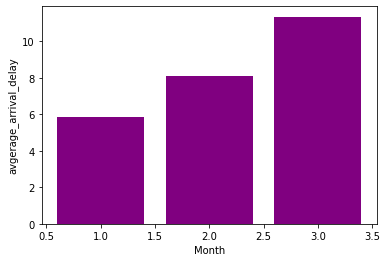

In [4]:
avg_delay1 = collection.aggregate([
        {'$group' : {'_id' : '$MONTH', 'avgerage_arrival_delay':{ '$avg' : '$ARRIVAL_DELAY'}}} 
        ])
df=pd.DataFrame(avg_delay1)  
display(df)
plt.bar(df['_id'], df['avgerage_arrival_delay'],color='purple')
plt.xlabel('Month')
plt.ylabel('avgerage_arrival_delay')
plt.show()

#### Arrange weekdays with respect to the average arrival delays caused. [Create a suitable plot using matplotlib/seaborn]


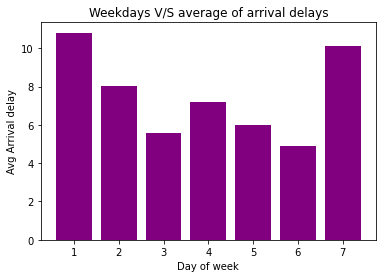

In [5]:
avg_delay1 = collection.aggregate([
        {'$group' : {'_id' : '$DAY_OF_WEEK', 'avgerage_arrival_delay':{ '$avg' : '$ARRIVAL_DELAY'}}} 
        ])
df=pd.DataFrame(avg_delay1) 
plt.bar(df['_id'], df['avgerage_arrival_delay'],color='purple')
plt.title('Weekdays V/S average of arrival delays')
plt.xlabel('Day of week')
plt.ylabel('Avg Arrival delay')
plt.show()

#### E Arrange Days of month as per cancellations done in descending order.  [Create a suitable plot using matplotlib/seaborn]


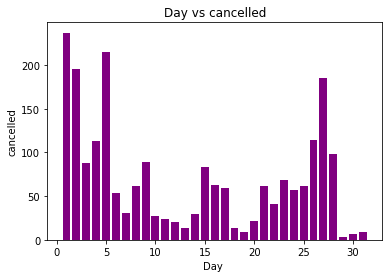

In [6]:
cancelled_day = collection.aggregate([
        {'$group' : {'_id' : '$DAY', 'cancelled':{ '$sum' : '$CANCELLED'}}} ,
    {'$sort':{'cancelled':-1}}
        ])
df=pd.DataFrame(cancelled_day) 
plt.bar(df['_id'], df['cancelled'],color='purple')
plt.title('Day vs cancelled')
plt.xlabel('Day ')
plt.ylabel('cancelled')
plt.show()

#### f Find the busiest airports with respect to day of week. Create a suitable plot using matplotlib/seaborn

,_id,busiest_airport
0,7,YUM
1,2,YUM
2,1,YUM
3,3,YUM
4,4,YUM
5,6,YUM
6,5,YUM


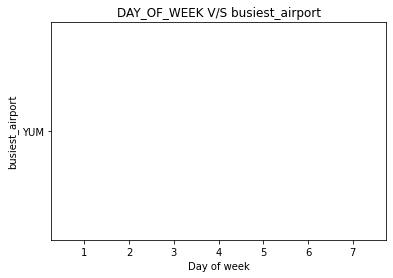

In [7]:
busiest_airport = collection.aggregate([
        {'$group' : {'_id' : '$DAY_OF_WEEK', 'busiest_airport':{ '$max' : '$ORIGIN_AIRPORT'}}} 
        ])
df=pd.DataFrame(busiest_airport) 
display(df)
plt.bar(df['_id'], df['busiest_airport'],color='purple')
plt.title('DAY_OF_WEEK V/S busiest_airport')
plt.xlabel('Day of week')
plt.ylabel('busiest_airport')
plt.show()

####  G Find top 10 Airlines of US. Create a suitable plot using matplotlib/seaborn.

,_id,count
0,WN,11738
1,DL,7989
2,EV,5916
3,OO,5708
4,AA,5250
5,UA,4701
6,US,3925
7,MQ,3502
8,B6,2548
9,AS,1586


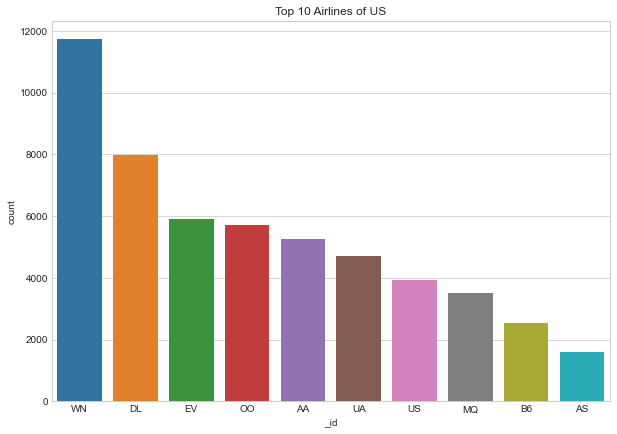

In [8]:
allDocuments=collection.aggregate([
        {'$group':{'_id':'$AIRLINE','count':{'$count':{}}}},
        { '$sort' : { 'count' : -1 }},{'$limit':10}])
df=pd.DataFrame(allDocuments) 
display(df)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))
sns.barplot(x=df['_id'],y=df['count'])

plt.title('Top 10 Airlines of US')

plt.show()


#### H Finding airlines that make the maximum, minimum number of cancellations.


In [9]:
min_maxcancelled = collection.aggregate([
    {'$group' : {'_id' : 'null', 
                 'max Cancelled':{ '$max' : '$CANCELLED'}, 
                 'min cancelled' : {'$min':'$CANCELLED'}}}, 
                {'$project' : {'_id' : 0}}])
for item in min_maxcancelled:
    print(item)

{'max Cancelled': 1, 'min cancelled': 0}


#### I Find and show airlines names in descending that make the most number of diversions made. [Create a suitable plot using matplotlib/seaborn]


,_id,total_counts
0,WN,35
1,OO,25
2,EV,22
3,DL,18
4,B6,16
5,AA,12
6,US,9
7,UA,8
8,MQ,5
9,HA,1


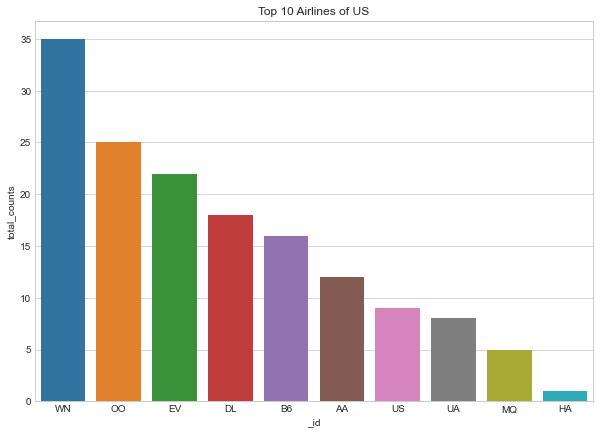

In [10]:
allDocuments=collection.aggregate([  
                                {'$match':{'DIVERTED':1}},
                                {'$group': {'_id':'$AIRLINE','total_counts': { '$count':{}}}},
                                {'$sort':{'total_counts':-1}} ])
df=pd.DataFrame(allDocuments) 
display(df)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))
sns.barplot(x=df['_id'],y=df['total_counts'])

plt.title('Top 10 Airlines of US')

plt.show()


#### j Finding days of month that see the most number of diversion


In [11]:
allDocuments=collection.aggregate([  
                                {'$group': {'_id':'$MONTH','Divition': { '$sum':'$DIVERTED'}}},
                                {'$sort':{'Divition':-1}},{'$limit':1} ])
df=pd.DataFrame(allDocuments) 
display(df)

,_id,Divition
0,2,60


#### k Calculating mean and standard deviation of departure delay for all flights in minutes


In [12]:
departure_delay = collection.find({},{'DEPARTURE_DELAY':1,'_id':0})   
departure_delay_df=pd.DataFrame(departure_delay)
print("Mean = " ,departure_delay_df.mean())
print("StandardDeviation = ", departure_delay_df.std())

Mean =  DEPARTURE_DELAY    11.329091
dtype: float64
StandardDeviation =  DEPARTURE_DELAY    39.620916
dtype: float64


#### l Calculating mean and standard deviation of arrival delay for all flights in minutes


In [13]:
arrival_delay = collection.find({},{'ARRIVAL_DELAY':1,'_id':0})
arrival_delay_df=pd.DataFrame(arrival_delay)
print("Mean = ", arrival_delay_df.mean())
print("StandardDeviation = ",arrival_delay_df.std() )

Mean =  ARRIVAL_DELAY    7.545458
dtype: float64
StandardDeviation =  ARRIVAL_DELAY    42.378386
dtype: float64


#### M Create a partitioning table “flights_partition” using partitioned by schema “CANCELLED”


#### N Finding all diverted Route from a source to destination Airport & which route is the most diverted route.

In [17]:
divertedroute=collection.aggregate([{'$match':{'DIVERTED':1}},
                                         {'$group' :{'_id' : {'ORIGIN_AIRPORT':'$ORIGIN_AIRPORT',"DESTINATION_AIRPORT":'$DESTINATION_AIRPORT'}, 'count':{'$sum':1}}},
                                         {'$sort':{'count':-1}}
                                         ])
df=pd.DataFrame(divertedroute)
print("Diverted Route from a source to destination Airport \n",df['_id'])
diverted_max=df.get('count').max()
print("\n\n")
    
print(" Diverted Route from a source to destination Airport \n",df[df['count']==diverted_max]['_id'])

Diverted Route from a source to destination Airport 
 0      {'ORIGIN_AIRPORT': 'IAH', 'DESTINATION_AIRPORT...
1      {'ORIGIN_AIRPORT': 'HOU', 'DESTINATION_AIRPORT...
2      {'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT...
3      {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT...
4      {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT...
                             ...                        
137    {'ORIGIN_AIRPORT': 'ATL', 'DESTINATION_AIRPORT...
138    {'ORIGIN_AIRPORT': 'SFO', 'DESTINATION_AIRPORT...
139    {'ORIGIN_AIRPORT': 'HNL', 'DESTINATION_AIRPORT...
140    {'ORIGIN_AIRPORT': 'PHL', 'DESTINATION_AIRPORT...
141    {'ORIGIN_AIRPORT': 'BOS', 'DESTINATION_AIRPORT...
Name: _id, Length: 142, dtype: object



 Diverted Route from a source to destination Airport 
 0    {'ORIGIN_AIRPORT': 'IAH', 'DESTINATION_AIRPORT...
1    {'ORIGIN_AIRPORT': 'HOU', 'DESTINATION_AIRPORT...
2    {'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT...
3    {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT...
4  